In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree

In [2]:
csv_file_name = "Drug_Crime_20231226.csv"

In [9]:
df = pd.read_csv( csv_file_name )
df.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,80488152,08/27/2011,02:00:00,NaN,(null),41.0,08/27/2011,117,DANGEROUS DRUGS,503,...,(null),STREET,N.Y. POLICE DEPT,(null),(null),"1,013,037","236,657",40.816206,-73.896001,"(40.8162058439227, -73.8960011932583)"
1,25436757,11/21/2000,19:10:00,11/21/2006,19:15:00,75.0,11/21/2006,235,DANGEROUS DRUGS,511,...,(null),STREET,N.Y. POLICE DEPT,(null),(null),"1,017,036","183,890",40.671360,-73.881811,"(40.6713598203364, -73.8818110231735)"
2,10354189,02/09/2005,21:25:00,02/09/2006,21:30:00,113.0,02/09/2006,117,DANGEROUS DRUGS,503,...,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,(null),(null),"1,046,315","187,088",40.679981,-73.776234,"(40.6799807384666, -73.7762339071953)"
3,10049866,01/10/2005,21:50:00,NaN,(null),42.0,01/10/2006,117,DANGEROUS DRUGS,503,...,(null),STREET,N.Y. POLICE DEPT,(null),(null),"1,008,690","238,862",40.822271,-73.911698,"(40.8222710411331, -73.911697780277)"
4,26116195,01/04/2005,19:18:00,NaN,(null),48.0,01/04/2007,235,DANGEROUS DRUGS,511,...,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,(null),(null),"1,011,751","246,839",40.844157,-73.900605,"(40.8441566000203, -73.9006054489734)"


In [10]:
target_column_name = "LAW_CAT_CD"

In [12]:
categorical_target_column = True
#categorical_target_column = False

In [13]:
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 443495
Total Number of Columns : 24


In [14]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

LAW_CAT_CD
MISDEMEANOR    350551
FELONY          92941
VIOLATION           3
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

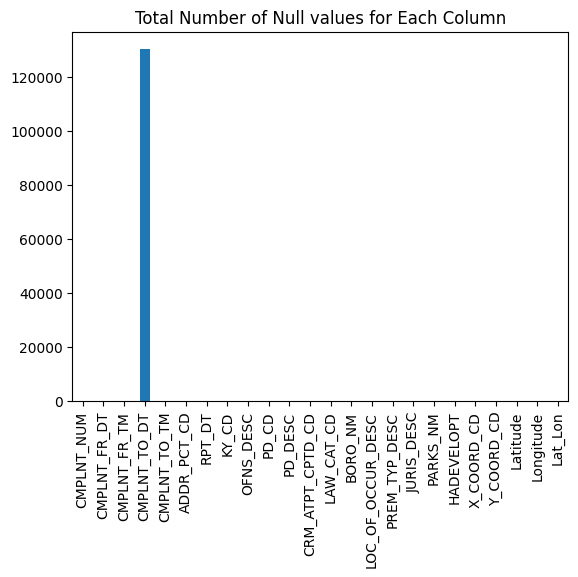

In [15]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")

In [16]:
( df.isnull().sum()/len(df) ) *100

CMPLNT_NUM            0.000000
CMPLNT_FR_DT          0.000676
CMPLNT_FR_TM          0.000000
CMPLNT_TO_DT         29.379813
CMPLNT_TO_TM          0.000000
ADDR_PCT_CD           0.000225
RPT_DT                0.000000
KY_CD                 0.000000
OFNS_DESC             0.000000
PD_CD                 0.000000
PD_DESC               0.000000
CRM_ATPT_CPTD_CD      0.000000
LAW_CAT_CD            0.000000
BORO_NM               0.000000
LOC_OF_OCCUR_DESC     0.003157
PREM_TYP_DESC         0.000000
JURIS_DESC            0.000000
PARKS_NM              0.000000
HADEVELOPT            0.000000
X_COORD_CD            0.000225
Y_COORD_CD            0.000225
Latitude              0.000225
Longitude             0.000225
Lat_Lon               0.000225
dtype: float64

In [19]:
droped_column_names = [ "CMPLNT_TO_DT" ,  "CMPLNT_NUM","PARKS_NM", "LOC_OF_OCCUR_DESC", "PARKS_NM", "HADEVELOPT"]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [21]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')

Maximum Null values in column (Before Handling)  : 3

------Replaced Null Values-------



C:\Users\User\AppData\Local\Temp\ipykernel_6656\3060275247.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


Maximum Null values in column (After Handling)  : 0


In [22]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    98.476646
True      1.523354
Name: count, dtype: float64


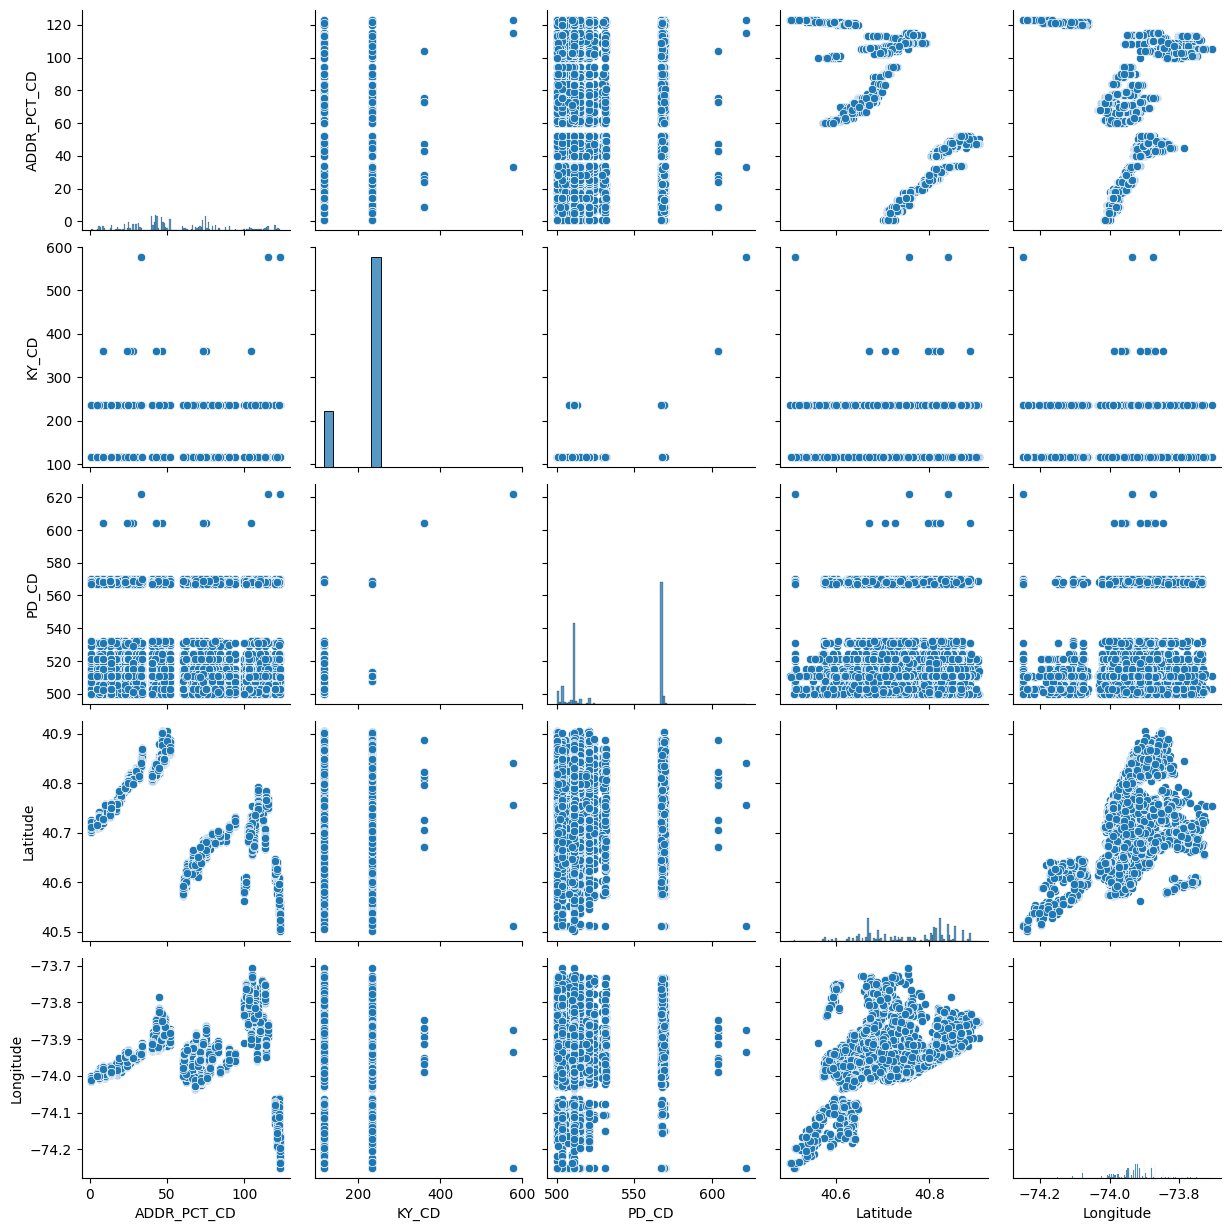

In [23]:
sns.pairplot( df )

In [24]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443495 entries, 0 to 443494
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CMPLNT_FR_DT      443495 non-null  object 
 1   CMPLNT_FR_TM      443495 non-null  object 
 2   CMPLNT_TO_TM      443495 non-null  object 
 3   ADDR_PCT_CD       443495 non-null  float64
 4   RPT_DT            443495 non-null  object 
 5   KY_CD             443495 non-null  int64  
 6   OFNS_DESC         443495 non-null  object 
 7   PD_CD             443495 non-null  int64  
 8   PD_DESC           443495 non-null  object 
 9   CRM_ATPT_CPTD_CD  443495 non-null  object 
 10  LAW_CAT_CD        443495 non-null  object 
 11  BORO_NM           443495 non-null  object 
 12  PREM_TYP_DESC     443495 non-null  object 
 13  JURIS_DESC        443495 non-null  object 
 14  X_COORD_CD        443495 non-null  object 
 15  Y_COORD_CD        443495 non-null  object 
 16  Latitude          44

CMPLNT_FR_DT        6313
CMPLNT_FR_TM        1441
CMPLNT_TO_TM        1441
ADDR_PCT_CD           77
RPT_DT              6200
KY_CD                  4
OFNS_DESC              3
PD_CD                 30
PD_DESC               24
CRM_ATPT_CPTD_CD       2
LAW_CAT_CD             3
BORO_NM                6
PREM_TYP_DESC         76
JURIS_DESC            20
X_COORD_CD          5484
Y_COORD_CD          5604
Latitude            5726
Longitude           5718
Lat_Lon             5763
dtype: int64

In [ ]:
categorical_columns = ["OFNS_DESC" , "PREM_TYP_DESC" , "JURIS_DESC"]
numeric_columns = [   "ADDR_PCT_CD", "KY_CD" , "PD_CD", "X_COORD_CD" , "Y_COORD_CD",  "Latitude" , "Longitude"]


 "CMPLNT_TO_DT" ,  "CMPLNT_NUM","PARKS_NM", "LOC_OF_OCCUR_DESC", "PARKS_NM", "HADEVELOPT"

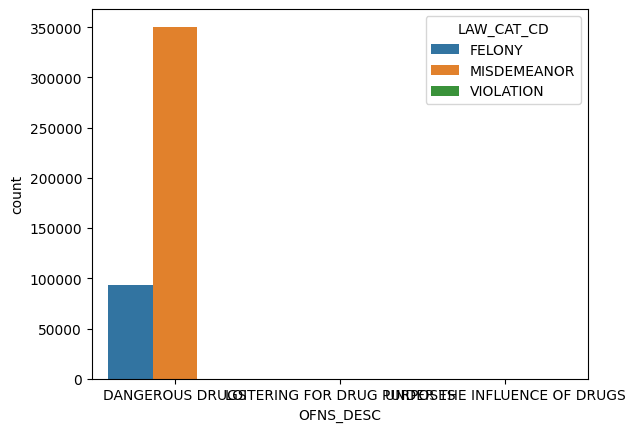

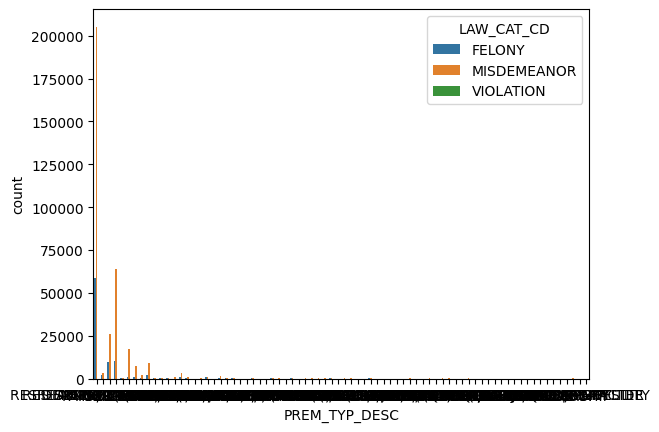

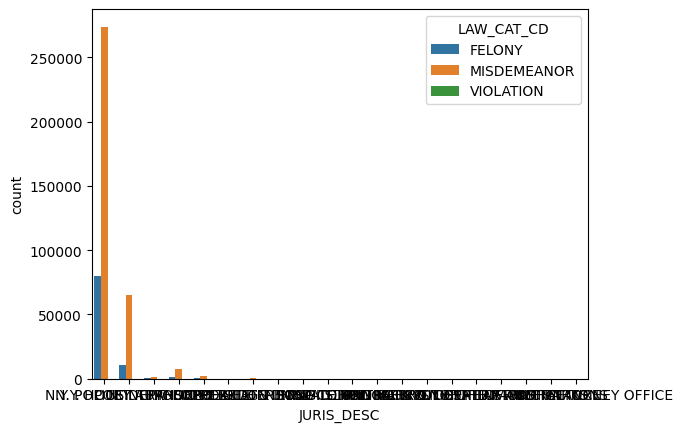

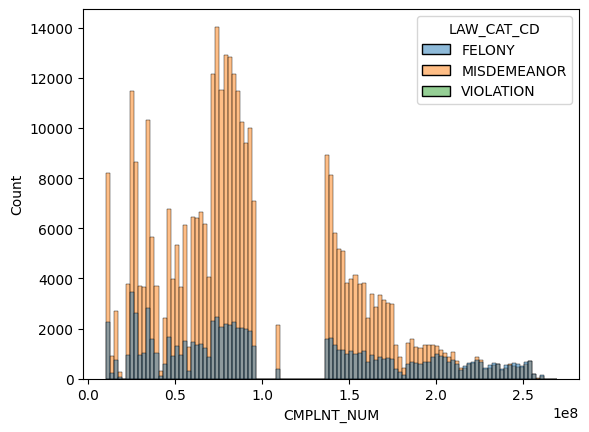

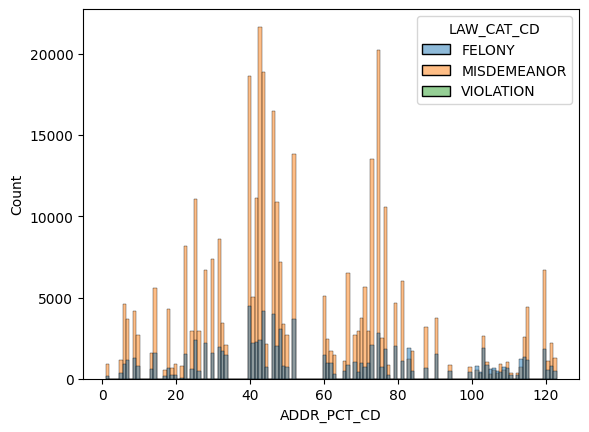

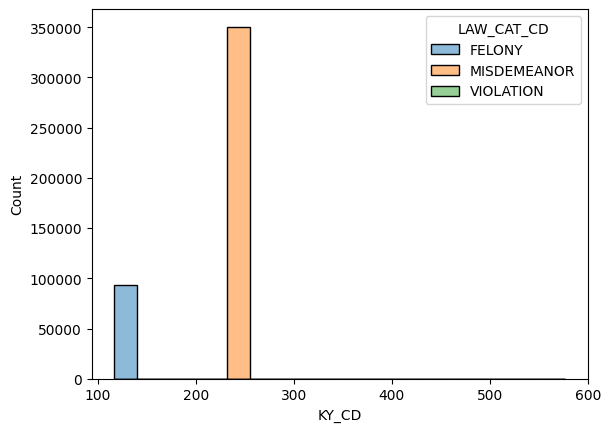

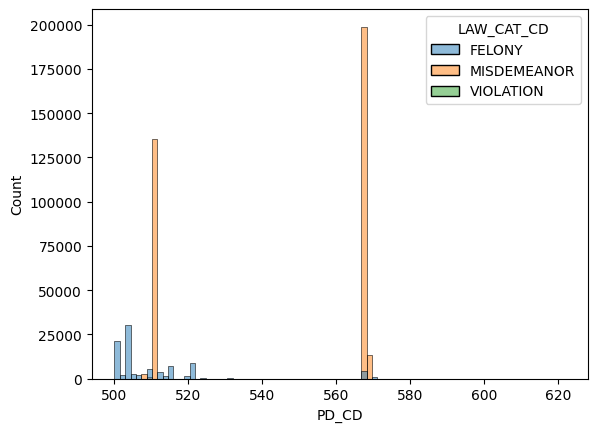

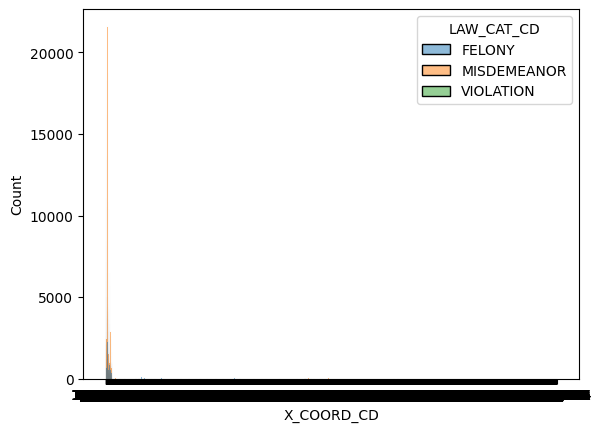

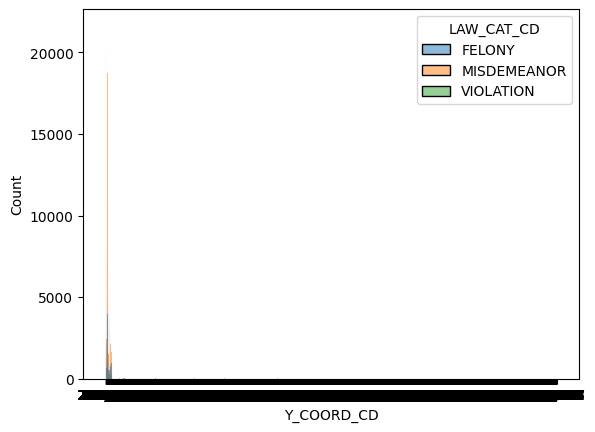

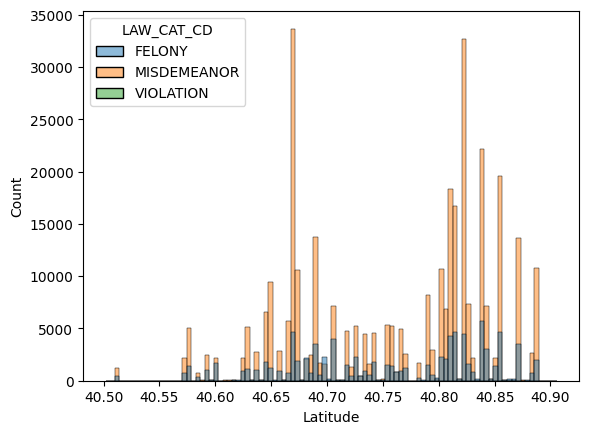

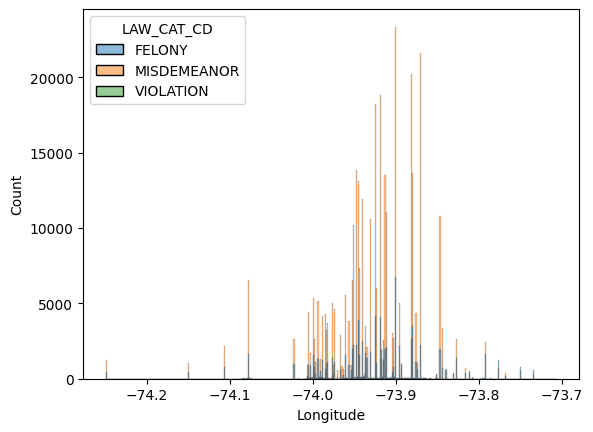

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()

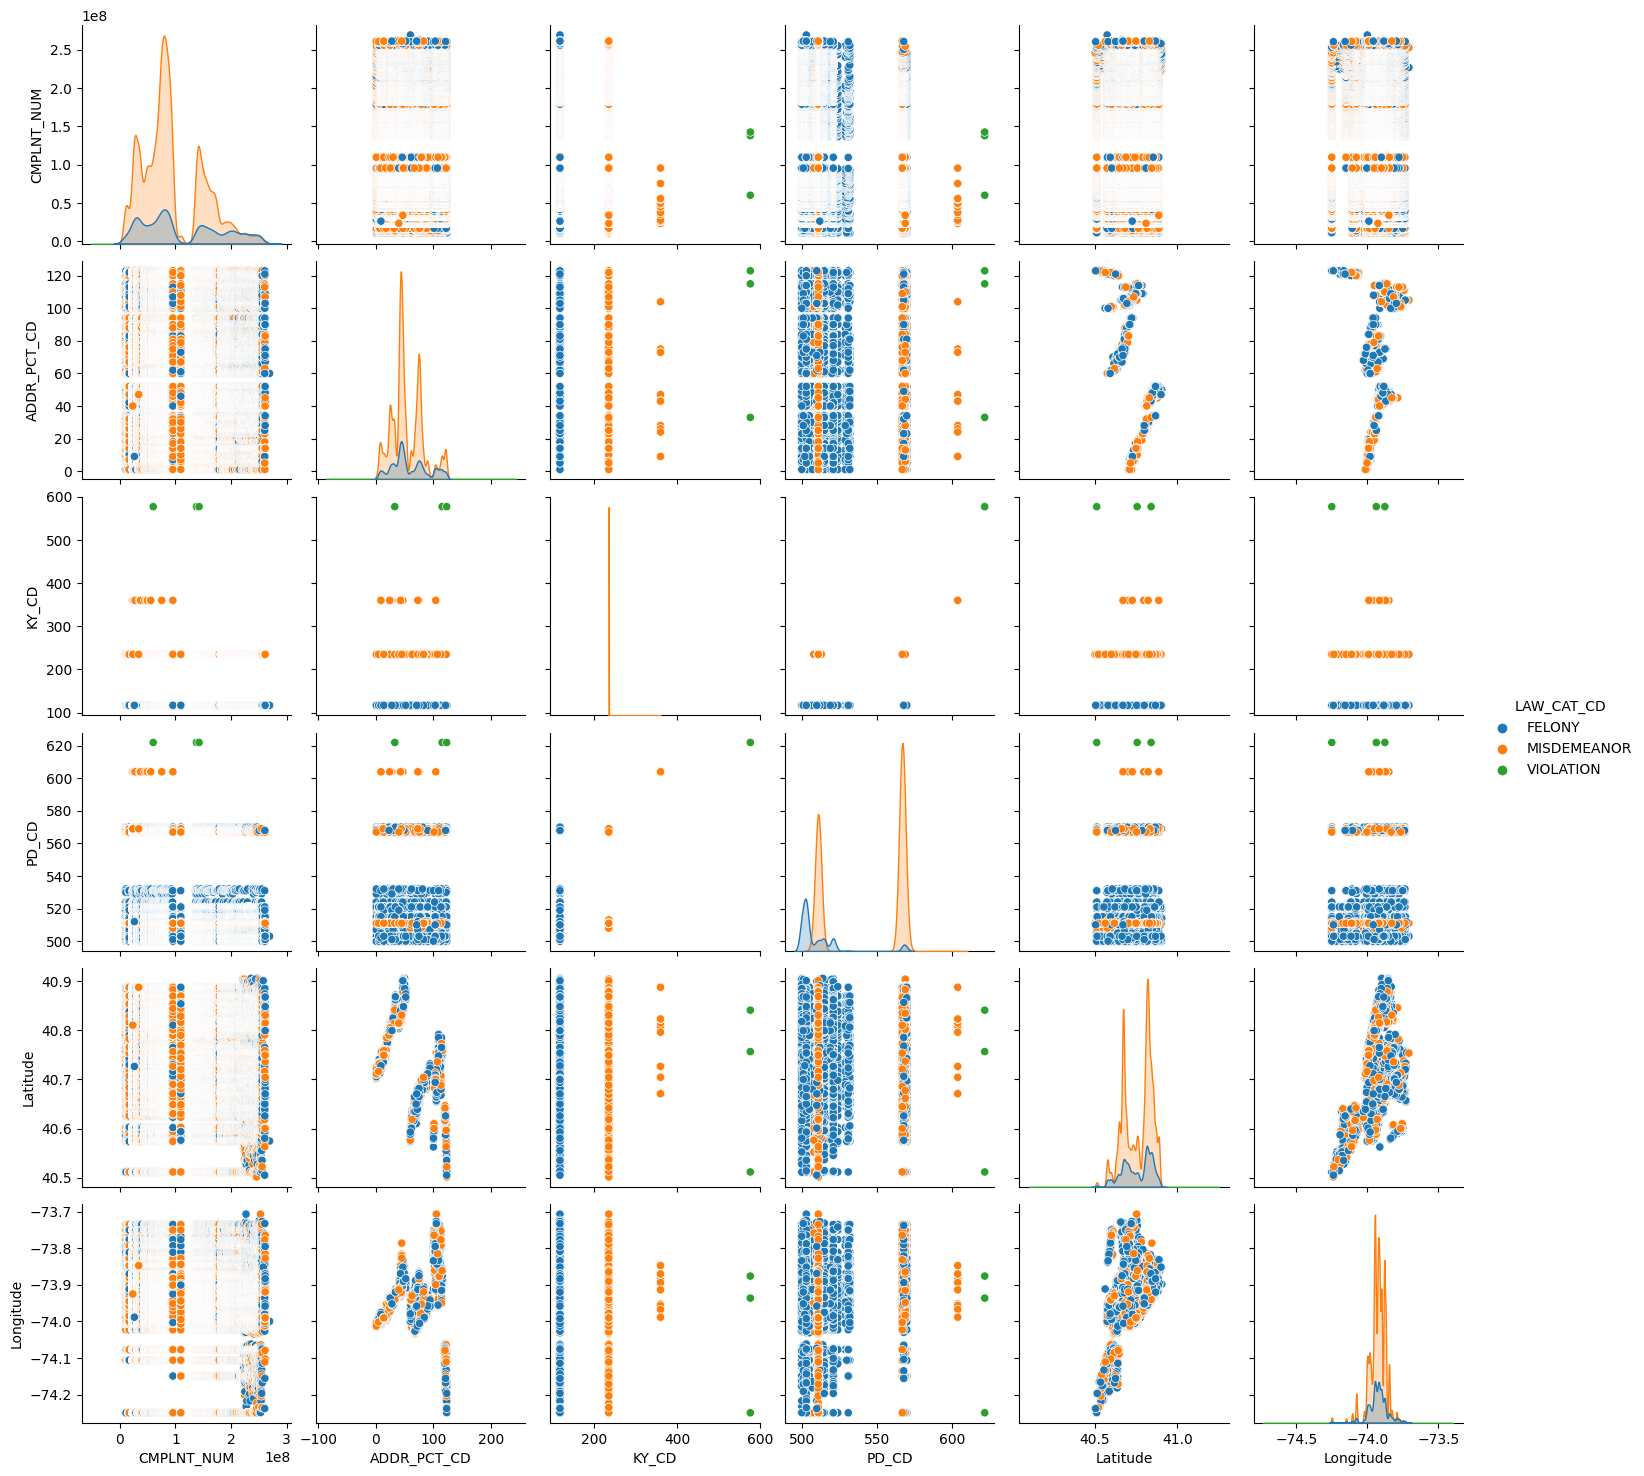

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443495 entries, 0 to 443494
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         443495 non-null  int64  
 1   CMPLNT_FR_DT       443492 non-null  object 
 2   CMPLNT_FR_TM       443495 non-null  object 
 3   CMPLNT_TO_DT       313197 non-null  object 
 4   CMPLNT_TO_TM       443495 non-null  object 
 5   ADDR_PCT_CD        443494 non-null  float64
 6   RPT_DT             443495 non-null  object 
 7   KY_CD              443495 non-null  int64  
 8   OFNS_DESC          443495 non-null  object 
 9   PD_CD              443495 non-null  int64  
 10  PD_DESC            443495 non-null  object 
 11  CRM_ATPT_CPTD_CD   443495 non-null  object 
 12  LAW_CAT_CD         443495 non-null  object 
 13  BORO_NM            443495 non-null  object 
 14  LOC_OF_OCCUR_DESC  443481 non-null  object 
 15  PREM_TYP_DESC      443495 non-null  object 
 16  JU

<Axes: >

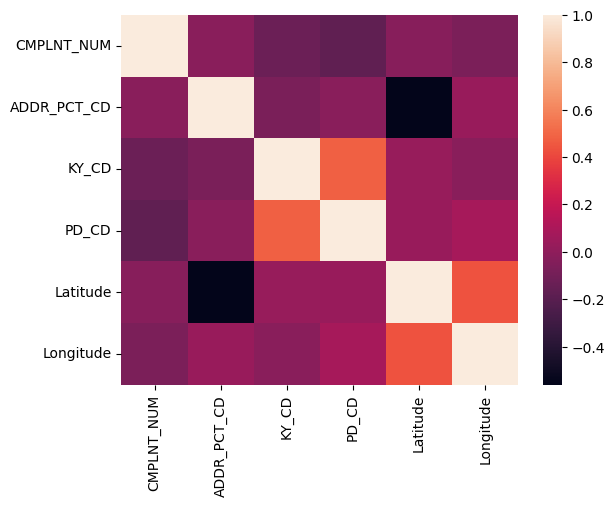

In [ ]:
sns.heatmap(df.corr( numeric_only =  True))

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
  if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")


IndentationError: ignored